# Get time of day site visits and build a heatmap from the dataset

##1 . prepare environment with proper librairies

In [1]:
%matplotlib inline

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #pour faire des graph dans la bonne couleur etc.. par default
import csv as csv

##2. upload file

> check whether you want to upload a CSV or XLSX file.

In [3]:
detailedFile = 'time_analysis_EST.xlsx'
#detailedFile = 'time_analysis.csv'

In [4]:
xls_file = pd.ExcelFile(detailedFile)
df = xls_file.parse('time_analysis')

#df = pd.read_csv(detailedFile, dtype=object)

In [5]:
#ressources
#http://chrisalbon.com/python/pandas_with_seaborn.html
#https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html

In [44]:
#df = sns.load_dataset("df")
df.tail()
#df.DoW.unique()
#df.day_of_week.unique()

,day_of_week,weekend,DoW,hour,device,count_fire
665,6,Weekend,Saturday,10,mobile,803
666,6,Weekend,Saturday,12,tablet,617
667,6,Weekend,Saturday,20,desktop,571
668,6,Weekend,Saturday,20,mobile,686
669,6,Weekend,Saturday,21,mobile app,14


##3. play around with dataframe

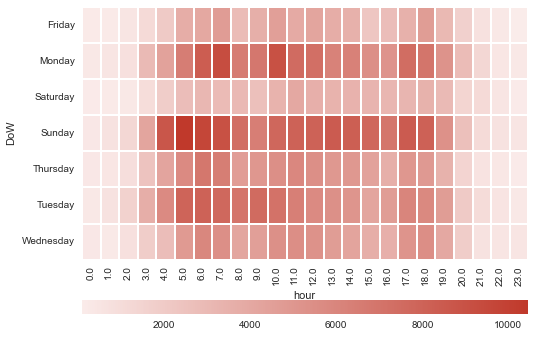

In [36]:
#df_unstacked = df.groupby(['DoW','hour'])['count_fire'].aggregate('sum').unstack().reset_index()
df_unstacked = df.groupby(['DoW','hour'])['count_fire'].aggregate('sum').unstack()
#df_unstacked.head()

#change palette
#cmap = sns.light_palette((260, 75, 60), input="husl")
cmap = sns.light_palette("#c0392b", as_cmap=True)

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)



#sns.heatmap(df_unstacked, fmt="d", cmap="YlGnBu")
#sns.heatmap(df_unstacked, fmt="d", cmap=cmap, center=df_unstacked.loc["Monday", 0])
#ax = sns.heatmap(df_unstacked, cmap=cmap, linewidths=.1, xticklabels = 2)
#ax = sns.heatmap(df_unstacked, cmap=cmap, linewidths=.1)
ax = sns.heatmap(df_unstacked, ax=ax, cmap = cmap,
                  cbar_ax=cbar_ax,
                  cbar_kws={"orientation": "horizontal"})

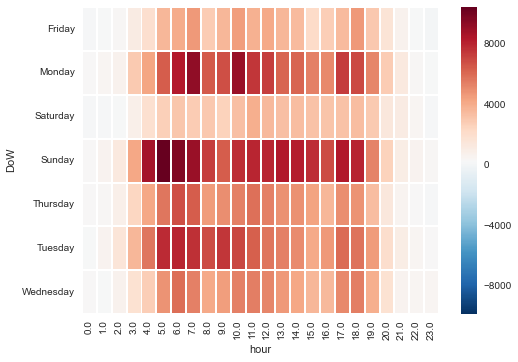

In [37]:
df_unstacked = df.groupby(['DoW','hour'])['count_fire'].aggregate('sum').unstack()
#sns.heatmap(df_unstacked,annot=True, fmt="d")
sns.heatmap(df_unstacked, fmt="d", center=df_unstacked.loc["Monday", 0])


In [38]:
df_unstacked.head()

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
DoW,,,,,,,,,,,,,,,,,,,,,
Friday,248,268,479,1160,2057,3720,4066,4743,2868,3656,...,3526,2302,2806,3537,4684,3076,1690,753,330,110
Monday,333,499,786,2988,4357,6502,8394,9299,6538,6853,...,6258,5473,5230,7432,7009,5279,2881,1343,470,316
Saturday,202,236,313,964,1928,2780,3144,2903,3034,2689,...,3431,3338,3207,3285,3483,2991,1471,1159,498,207
Sunday,378,715,1357,4217,8765,10458,9707,9049,7363,6427,...,8248,7773,6921,8466,8141,5385,2675,1086,712,485
Thursday,371,472,899,2488,4244,5733,6882,6465,4650,5026,...,4983,4370,3664,5023,4889,3478,1494,606,412,223


In [39]:
df.device.unique()

array([u'mobile app', u'desktop', u'mobile', u'tablet', u'game console',
       u'unknown'], dtype=object)

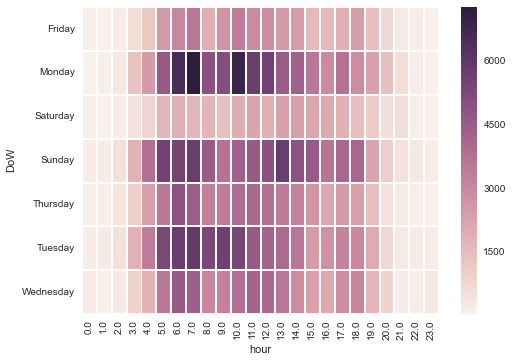

In [40]:
subset = df[df['device'] == 'desktop']
df_unstacked = subset.groupby(['DoW','hour'])['count_fire'].aggregate('sum').unstack()
sns.heatmap(df_unstacked, fmt="d")

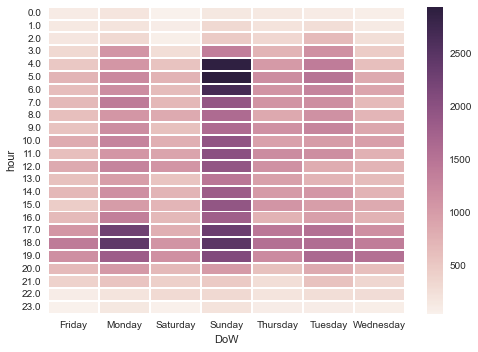

In [41]:
subset = df[df['device'] == 'mobile']
df_unstacked = subset.groupby(['hour','DoW'])['count_fire'].aggregate('sum').unstack()
sns.heatmap(df_unstacked, fmt="d")

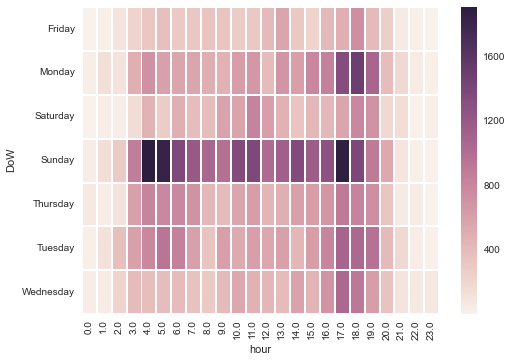

In [42]:
subset = df[df['device'] == 'tablet']
df_unstacked = subset.groupby(['DoW','hour'])['count_fire'].aggregate('sum').unstack()
sns.heatmap(df_unstacked, fmt="d")

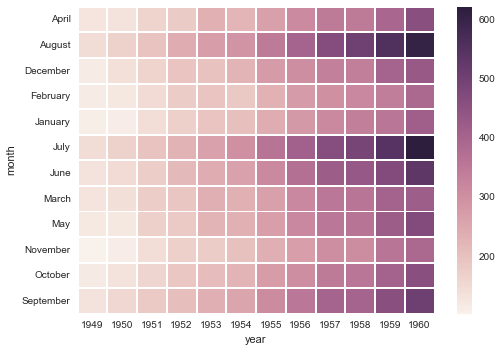

In [43]:
#sns.heatmap([df.DoW, df.hour], annot=True, fmt="d")
sns.set()
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
flights_long.head()
flights.head()
# Draw a heatmap with the numeric values in each cell
#sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

ax = sns.heatmap(flights)